In [61]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [62]:
(X_train,y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [63]:
X_train.shape

(50000, 32, 32, 3)

In [64]:
X_test.shape

(10000, 32, 32, 3)

In [65]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

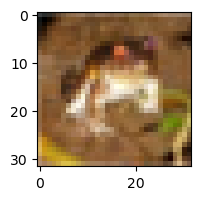

In [66]:
plt.figure(figsize=(15,2))
plt.imshow(X_train[0])

In [67]:
y_train.shape

(50000, 1)

In [68]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [69]:
# I want to be able to name the class [class labels]
classes = ['airplane','automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [70]:
y_train[0][0]

6

In [71]:
classes[y_train[0][0]]

'frog'

In [72]:
### You can reshape y_train to be a 1D-array
### the first input has -1 here means you want to keep the first dimension (i.e 10000) of y_trian
### the second is left blank, which means you want to flatten the array

y_train = y_train.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [73]:
y_train[0]

6

In [74]:
### A function to display the image

def plot_sample(index):
    plt.figure(figsize = (15,2))
    plt.imshow(X_train[index])
    print(classes[y_train[index]])

automobile


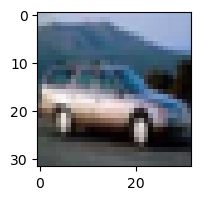

In [75]:
plot_sample(4)

In [76]:
### Normalization of the images

X_train = X_train/255
X_test = X_test/255

In [77]:
#### Building a simple ANN for this dataset

ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

ann.compile(optimizer='SGD',
           loss = 'sparse_categorical_crossentropy',    #we didn't use "categorical_crossentropy" here because y_train was not one-hot encoded
           metrics=['accuracy'])                        ## i.e y_train is directly a value here, and not 0s and 1s.

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 73s 46ms/step - loss: 1.8122 - accuracy: 0.3554
Epoch 2/5
1563/1563 [==============================] - 71s 45ms/step - loss: 1.6250 - accuracy: 0.4274
Epoch 3/5
1563/1563 [==============================] - 71s 46ms/step - loss: 1.5415 - accuracy: 0.4558
Epoch 4/5
1563/1563 [==============================] - 70s 45ms/step - loss: 1.4823 - accuracy: 0.4773
Epoch 5/5
1563/1563 [==============================] - 73s 47ms/step - loss: 1.4313 - accuracy: 0.4959


In [79]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 3s 11ms/step - loss: 1.4403 - accuracy: 0.4918


[1.4402700662612915, 0.4918000102043152]

In [81]:
ann.predict(X_test)

313/313 [==============================] - 3s 10ms/step


array([[0.27856728, 0.5162448 , 0.57471496, ..., 0.08404329, 0.668698  ,
        0.14036688],
       [0.9226542 , 0.94443434, 0.20772375, ..., 0.10117456, 0.981711  ,
        0.9798245 ],
       [0.9759865 , 0.9026997 , 0.31139258, ..., 0.23393951, 0.97625965,
        0.9094698 ],
       ...,
       [0.10438136, 0.06196982, 0.81358814, ..., 0.6503482 , 0.32794198,
        0.14866419],
       [0.5714793 , 0.40524504, 0.67538583, ..., 0.47669527, 0.13440438,
        0.28008926],
       [0.50309294, 0.238764  , 0.625378  , ..., 0.93071014, 0.23014165,
        0.33345702]], dtype=float32)

In [82]:
y_pred_ann = ann.predict(X_test)
y_pred_ann[4]

313/313 [==============================] - 3s 10ms/step


array([0.27233884, 0.1629101 , 0.7423047 , 0.61870193, 0.9442966 ,
       0.6014267 , 0.8926651 , 0.57746553, 0.31483105, 0.08634074],
      dtype=float32)

In [83]:
## to see the class that was predicted

classes[np.argmax(y_pred_ann[4])]

'deer'

In [84]:
## to see the true class

classes[y_test[4][0]]

'frog'

In [85]:
from sklearn.metrics import confusion_matrix, classification_report

## to represent y_pred with the the class having the highest score
y_pred_ann_classes = [np.argmax(element) for element in y_pred_ann]


print('Classification report: \n', classification_report(y_test, y_pred_ann_classes))

## prediction was poor 

Classification report: 
               precision    recall  f1-score   support

           0       0.55      0.52      0.54      1000
           1       0.56      0.64      0.60      1000
           2       0.42      0.29      0.35      1000
           3       0.38      0.32      0.35      1000
           4       0.55      0.25      0.34      1000
           5       0.49      0.28      0.36      1000
           6       0.43      0.71      0.54      1000
           7       0.48      0.61      0.54      1000
           8       0.56      0.69      0.61      1000
           9       0.51      0.60      0.55      1000

    accuracy                           0.49     10000
   macro avg       0.49      0.49      0.48     10000
weighted avg       0.49      0.49      0.48     10000



In [86]:
#### Training same model, using CNN before the dense ANN layers for this dataset
### We add convolution and pooling layers in front of the ANN layers

cnn = models.Sequential([
    
    #cnn
    # from the architecture;
    # add your first convolution layer (convolution is for detecting your features in your image)
    # here we use 32 filters (to detect 32 different features or edges in your image) each with size 3 x 3 
    # add your maxpooling layer (averagepooling can also be used)
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPool2D((2,2)),
    
    #another set of convolution and pooling layers
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D((2,2)),
    
    #ann
    #dense layers
    #when you're in a middle layer, you don't need to specify the shape. The network can figure it out automatically
    #just to keep things simple, we'll use only one dense network with fewer neurons
    #because cnn would have done most of the work (so we don't need so many neurons and deep layers)
    #softmax activation is like sigmoid, the difference is that it normalizes your output (its a common activation function)
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  #output layer, we have 10 classes 
])

cnn.compile(optimizer='adam',
           loss = 'sparse_categorical_crossentropy',    
           metrics=['accuracy'])                        

cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.4830 - accuracy: 0.4651
Epoch 2/10
1563/1563 [==============================] - 26s 17ms/step - loss: 1.1350 - accuracy: 0.6046
Epoch 3/10
1563/1563 [==============================] - 28s 18ms/step - loss: 1.0066 - accuracy: 0.6503
Epoch 4/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.9195 - accuracy: 0.6812
Epoch 5/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.8519 - accuracy: 0.7051
Epoch 6/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.7969 - accuracy: 0.7240
Epoch 7/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.7491 - accuracy: 0.7403
Epoch 8/10
1563/1563 [==============================] - 26s 16ms/step - loss: 0.7030 - accuracy: 0.7562
Epoch 9/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.6656 - accuracy: 0.7695
Epoch 10/10
1563/1563 [==============================] - 26s 17m

In [87]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.9004 - accuracy: 0.7029


[0.9004203081130981, 0.7028999924659729]

In [88]:
cnn.predict(X_test)
## The values in each of these elements are actually probability distribution betwee 0 and 1 (because we used 'softmax')
## And we are interested in which element is the max (we use argmax function to get this)

313/313 [==============================] - 2s 6ms/step


array([[2.6821168e-03, 8.6378219e-05, 1.7899357e-03, ..., 5.5482706e-05,
        4.2822413e-02, 4.0680377e-04],
       [2.2439077e-03, 1.6996333e-02, 7.6137818e-05, ..., 1.3792194e-08,
        9.8062080e-01, 6.1426334e-05],
       [1.2100659e-01, 4.6428081e-02, 4.8313672e-03, ..., 2.8696887e-03,
        7.9212886e-01, 2.0459535e-02],
       ...,
       [3.7053681e-03, 7.1977620e-06, 1.4596617e-01, ..., 1.4238399e-01,
        4.9232296e-04, 7.2381408e-06],
       [1.3113483e-03, 1.5661584e-02, 1.1483683e-03, ..., 2.0902084e-04,
        1.1507269e-05, 1.0681753e-05],
       [4.3714344e-06, 2.9912060e-06, 3.7265447e-04, ..., 9.6912730e-01,
        5.4780236e-07, 1.9994941e-06]], dtype=float32)

In [89]:
y_pred_cnn = cnn.predict(X_test)
y_pred_cnn[4]

313/313 [==============================] - 2s 5ms/step


array([3.6899368e-07, 9.7691161e-05, 1.1585634e-02, 1.0939755e-02,
       9.0925419e-01, 1.9055331e-03, 6.6155814e-02, 2.2388647e-05,
       2.8132265e-05, 1.0532670e-05], dtype=float32)

In [90]:
## to see the class that was predicted

classes[np.argmax(y_pred_cnn[4])]

'deer'

In [91]:
## to see the true class

classes[y_test[4][0]]

'frog'

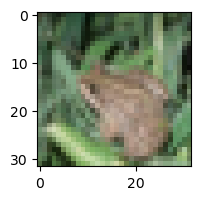

In [106]:
plt.figure(figsize=(15,2))
plt.imshow(X_test[4])

In [93]:
from sklearn.metrics import confusion_matrix, classification_report

## to represent y_pred with the the class having the highest score
y_pred_cnn_classes = [np.argmax(element) for element in y_pred_cnn]  ## using list comprehension in python


print('Classification report: \n', classification_report(y_test, y_pred_cnn_classes))


Classification report: 
               precision    recall  f1-score   support

           0       0.70      0.74      0.72      1000
           1       0.76      0.85      0.80      1000
           2       0.54      0.64      0.59      1000
           3       0.55      0.50      0.52      1000
           4       0.69      0.62      0.65      1000
           5       0.63      0.64      0.63      1000
           6       0.78      0.78      0.78      1000
           7       0.83      0.74      0.78      1000
           8       0.76      0.83      0.79      1000
           9       0.83      0.71      0.76      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000

